# Домашнее задание №3

Это задание состоит из двух сюжетов:

1) Workflow ML-модели. Несложный код, который вы пишете всегда - чтобы обучить модель от начала (загрузка данных) и до конца (оценка качества и улучшение модели).

2) Самостоятельная реализация различных способов кодирования категориальных признаков - полезное упражнение для понимания кодировок (в дальнейшем будем использовать готовые функции).

## <font color='green'>Часть 1. ML workflow (**всего 5 баллов**)</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from itertools import product

import seaborn as sns

### Загрузим данные для работы. 

In [2]:
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)
print(data.DESCR)
df = data.frame
df.head()

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Будем решать задачу регрессии: необходимо предсказать уровень сахара в крови по характеристикам пациентов

### Шаг 1.  (**0.2 балла**)
Создайте матрицу X объект-признак и целевой вектор y ("target")

In [4]:
X_ = df.drop(columns='target')

In [5]:
X_.sample(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
156,-0.016412,-0.044642,-0.010517,0.001215,-0.037344,-0.035760,0.011824,-0.039493,-0.021394,-0.034215
315,0.009016,-0.044642,-0.020218,-0.053871,0.031454,0.020607,0.056003,-0.039493,-0.010904,-0.001078
38,-0.001882,0.050680,0.071397,0.097616,0.087868,0.075407,-0.021311,0.071210,0.071424,0.023775


In [6]:
y= df[['target']]

In [7]:
y.sample(3)

,target
61,144.0
296,89.0
407,140.0


### Шаг 2. (**0.2 балла**)
Разбейте данные на train и test (доля тестовых данных - 30%).

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=.3, random_state=1234)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309, 1), (133, 1))

### Шаг 3. (**0.2 балла**)
Обучите линейную регрессию на тренировочных данных и сделайте предсказания на train и на test.

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.coef_

array([[ -24.70576709, -280.56792129,  527.45933864,  318.49015311,
        -706.4077357 ,  412.33917797,   69.86557244,  171.51413052,
         753.26135607,   77.5336563 ]])

In [13]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

In [14]:
#pred_train

### Шаг 4. (**0.4 балла**)
Выведите на экран ошибку MSE на train и на test, затем выведите на экран ошибку r2 на train и test.  

In [15]:
print(f'MSE on test data = {mean_squared_error(y_test, pred_test)}\n\
MSE on train data = {mean_squared_error(y_train, pred_train)}')

print(f'\nMSE on test data = {r2_score(y_test, pred_test)}\n\
MSE on train data = {r2_score(y_train, pred_train)}')

MSE on test data = 2848.4181468056436
MSE on train data = 2874.9939194913864

MSE on test data = 0.4891305995339643
MSE on train data = 0.5272912505923519


### Шаг 5. (**0.5 балла**)
Вычислите среднее качество (r2) модели на кросс-валидации с k=5 фолдами.

In [16]:
cv_scores = cross_val_score(model, X_, y, scoring='r2', cv=5)

print(cv_scores.mean())

0.4823181221114939


### Шаг 6.  (**0.5 балла**)
Теперь примените линейную регрессию с L1-регуляризацией (Lasso) для данной задачи. Объявите модель и подберите параметр регуляризации alpha по сетке. Ищите alpha в диапазоне (0.1, 1.1) с шагом 0.1. 

Осуществите подбор параметра alpha по тренировочным данным (Xtrain, ytrain).

In [17]:
from sklearn.linear_model import Lasso

In [18]:
# Создадим список, в который будем записывать alpha и r2_score на каждой иттерации
r2_scores = []

for alpha in np.arange(0.1, 1.1, 0.1):
    
    model_lasso = Lasso(alpha=alpha)
    
    model_lasso.fit(X_train, y_train)
    pred_train = model_lasso.predict(X_train)
    
    r2_s = r2_score(y_train, pred_train)
    r2_scores.append((alpha, round(r2_s, 5)))

In [19]:
r2_scores

[(0.1, 0.51921),
 (0.2, 0.50771),
 (0.30000000000000004, 0.49211),
 (0.4, 0.47291),
 (0.5, 0.46042),
 (0.6, 0.44515),
 (0.7000000000000001, 0.4271),
 (0.8, 0.40661),
 (0.9, 0.38595),
 (1.0, 0.36286)]

In [20]:
import matplotlib.pyplot as plt

In [21]:
# Достанем из r2_scores значения alpha и r2_score чтобы построить график r2_score(alpha)
alpha = [i[0] for i in r2_scores]
scores = [i[1] for i in r2_scores]

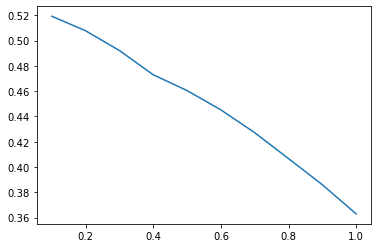

In [22]:
plt.plot(alpha, scores)

### Шаг 7.  (**0.5 балла**)
Выведите наилучший алгоритм и наилучшее качество по результатам подбора alpha (best_estimator_ и best_score_).

In [23]:
#Отсортируем список по значению r2_score
r2_scores = sorted(r2_scores, key=lambda x: x[1], reverse=True)

In [24]:
#Выведем значения alpha и r2_score для лучшей по качеству иттерации
best_tup = r2_scores[0]
best_score = best_tup[1]
best_estimator = best_tup[0]

print(f'best estimator = {best_estimator} and best score = {best_score} (on train dataset)')

best estimator = 0.1 and best score = 0.51921 (on train dataset)


### Шаг 8.  (**0.5 балла**)

С помощью найденного best_estimator_ сделайте предсказание на тестовых данных и выведите на экран r2-score на тесте.

In [25]:
best_model = Lasso(alpha=best_estimator)
best_model.fit(X_train, y_train)

pred_test = best_model.predict(X_test)

r2_s = r2_score(y_test, pred_test)

print(r2_s)

0.4858154132712039


### Шаг 9.  (**0.5 балла**)

Попробуем улучшить качество модели за счет добавления полиномиальных признаков. Создайте pipeline, состоящий из добавления полиномиальных признаков степени 2, а затем применения линейной регрессии.

Затем вычислите r2-score этой модели на кросс валидации с пятью фолдами.

In [26]:
model = LinearRegression()
get_poly = PolynomialFeatures(degree=2, interaction_only=True)

In [27]:
pipe = Pipeline(steps=[('create_poly', get_poly), ('linear_model', model)])

In [28]:
cv_scores = cross_val_score(pipe, X_, y, cv =5, scoring='r2')

In [29]:
cv_scores

array([0.37838144, 0.54774356, 0.4678398 , 0.19378276, 0.52640065])

In [30]:
cv_scores.mean()

0.42282964459863487

### Шаг 10.  (**0.5 балла**)
Обучите модель (pipeline) на тренировочных данных и сделайте предсказания для train и test, затем выведите на экран r2-score и MSE на тренировочных и на тестовых данных.

In [31]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('create_poly', PolynomialFeatures(interaction_only=True)),
                ('linear_model', LinearRegression())])

In [32]:
pred_test = pipe.predict(X_test)
pred_train = pipe.predict(X_train)

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)

r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

print(f'mse, r2 train = {mse_train, r2_train}\nmse, r2 test = {mse_test, r2_test}')

mse, r2 train = (3463.1294498381876, 0.4305895465826183)
mse, r2 test = (5547.413533834587, 0.005060465105715228)


In [33]:
#pipe.score(X_train, y_train)

### Попытка улучшить, убрав переобучение с polyfeatures

In [34]:
r2_scores_train = []
r2_scores_test = []
for alpha in np.arange(0.00001, 0.2, 0.002):
    
    model = Lasso(alpha=alpha)
    
    pipe = Pipeline(steps=[('create_poly', get_poly), ('linear_model', model)])
    
    pipe.fit(X_train, y_train)
    pred_train = pipe.predict(X_train)
    pred_test = pipe.predict(X_test)
    
    r2_s_train = r2_score(y_train, pred_train)
    r2_scores_train.append((alpha, round(r2_s_train, 5)))
    
    r2_s_test = r2_score(y_test, pred_test)
    r2_scores_test.append((alpha, round(r2_s_test, 5)))
    
    #print(f'alpha = {alpha}\nr2_score_train = {r2_s_train}\nr2_score_test = {r2_s_test}\nmodel coefs:\n {model.coef_}\n')

D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277016.34955233097, tolerance: 187.93244724919097
  model = cd_fast.enet_coordinate_descent(


In [35]:
#Лучшее качество будет видно если посмотреть результаты, раскомментив последнюю строчку прыдыдущей ячейки
model = Lasso(alpha=0.0101)

pipe = Pipeline(steps=[('create_poly', get_poly), ('linear_model', model)])

In [36]:
cv_scores = cross_val_score(pipe, X_, y, cv=5, scoring='r2')

In [37]:
cv_scores.mean()

0.4934849994015084

In [38]:
alpha_train = [i[0] for i in r2_scores_train]
scores_train = [i[1] for i in r2_scores_train]

alpha_test = [i[0] for i in r2_scores_test]
scores_test = [i[1] for i in r2_scores_test]

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


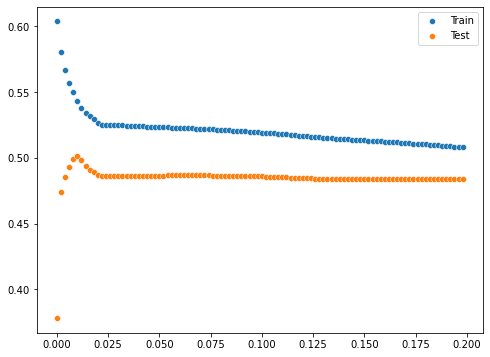

In [39]:
#Выведем результаты иттераций 
plt.figure(figsize=(8,6))
sns.scatterplot(alpha_train, scores_train, label='Train')
sns.scatterplot(alpha_test, scores_test, label='Test')
plt.legend()
plt.show()

**ИТОГО**: Качество на кросс-валидации выросло, лучшее качество на тесте >0.5

### Сделайте выводы. Для этого ответьте на вопросы: (**1 балл**)

1) Хорошее ли качество показала исходная модель (линейная регрессия без регуляризации)? Является ли эта модель переобученной?
**Ответ**: Исходная модель показала умеренное качество: r2_test = 0.489, 0.4823 кросс-вал. Так как на тренировочных данных качество было ненамного выше r2_train = 0.527, то можно сделать вывод, что модель не переобучена. 

2) Помогла ли L1-регуляризация улучшить качество модели?
**Ответ**: Как видно на графике зависимости scores(alpha), качество модели падает с увеличением параметра alpha L1 регуляризации на тренирововчных данных.
С параметром alpha=0 качество будет лучшим, что равнозначно модели Линейной Регрессии без регуляризации.
На тестовых данных качество также немного упало (с парметром alpha=0.1)
L1 регуляризация не помогла улучшить качемство.

3) Помогло ли добавление полиномов второй степени улучшить качество модели? Как добавление новых признаков повлияло на переобучение?
**Ответ**: Добавление полиномов второй степени ухудшило качество на тренировочных данных и привело к переобучению.


### *Попытайтесь улучшить модель (добейтесь наилучшего качества) - можно использовать любые методы 
(**дополнительно 1 балл**)

In [40]:
df[:3]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


<AxesSubplot:>

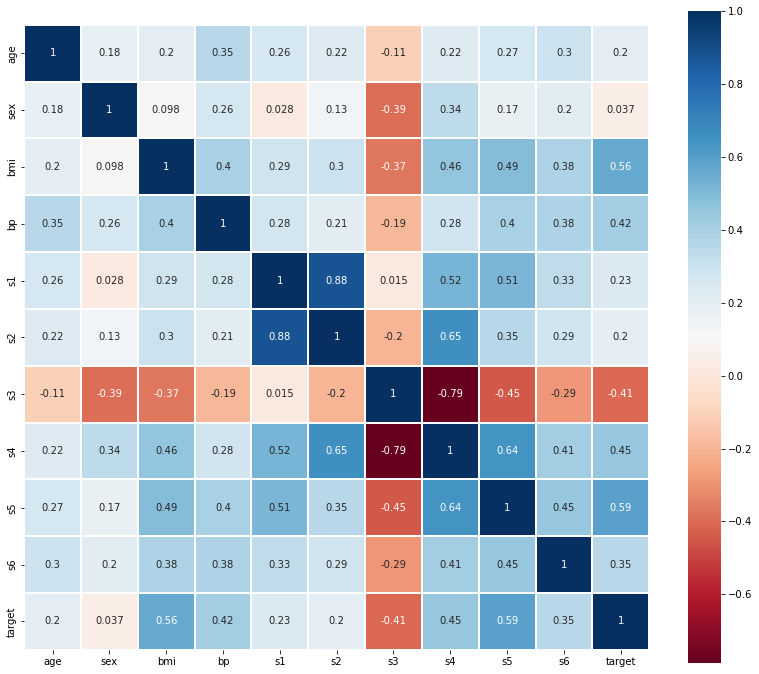

In [41]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

sns.heatmap(df.corr('spearman'),
           linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

<AxesSubplot:xlabel='target', ylabel='Count'>

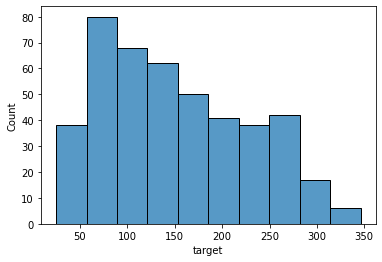

In [42]:
#Посмотрим распределение значений таргета
sns.histplot(df.target)

In [43]:
df_comp = df.copy()

In [44]:
df_comp.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [45]:
X_ = df_comp.drop(columns='target')
y = df_comp[['target']]

In [46]:
#from sklearn.preprocessing import StandardScaler

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=1234)

In [48]:
X_test.shape, y_test.shape

((133, 10), (133, 1))

In [49]:
X_test[:5]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
353,-0.052738,-0.044642,-0.055785,-0.036656,0.089244,-0.003193,0.008142,0.034309,0.132373,0.003064
29,0.067136,0.050680,-0.006206,0.063187,-0.042848,-0.095885,0.052322,-0.076395,0.059424,0.052770
173,-0.063635,0.050680,-0.079497,-0.005671,-0.071743,-0.066449,-0.010266,-0.039493,-0.018118,-0.054925
131,-0.096328,-0.044642,-0.069797,-0.067642,-0.019456,-0.010708,0.015505,-0.039493,-0.046879,-0.079778
387,-0.045472,-0.044642,0.015350,-0.074528,-0.049727,-0.017284,-0.028674,-0.002592,-0.104365,-0.075636


In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [53]:
true_pred_list = list(zip(y_test.values.reshape(y_test.shape[0]), pred_test.reshape(pred_test.shape[0])))

In [54]:
#true_pred_list

In [55]:
base_line = np.arange(y_test.values.min(), y_test.values.max(), 10)

<AxesSubplot:>

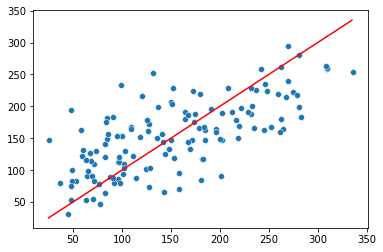

In [56]:
#Посомтрим результаты предсказания и сравним с правильными ответами
sns.scatterplot(x=[i[0] for i in true_pred_list], y=[i[1] for i in true_pred_list])
sns.lineplot(x=base_line, y=base_line, color='red')

**Проблемы**: Переоценка на небольших значениях, недооценка на больших значениях.
т.е нам нужны нелинейные признаки, которые бы быстрее возрастали с увеличением значения и быстрее убывали на небольших значениях.

In [57]:
print(r2_score(y_train, pred_train), r2_score(y_test, pred_test))

0.5272912505923519 0.4891305995339643


In [58]:
cv_scores = cross_val_score(model, X_, y, scoring='r2', cv=5)

In [59]:
cv_scores.mean()

0.4823181221114939

In [60]:
from sklearn.linear_model import Ridge

In [61]:
r2_scores = []

for alpha in np.arange(0.001, 0.2, 0.05):
    
    model_lasso = Ridge(alpha=alpha)
    
    model_lasso.fit(X_train, y_train)
    pred_train = model_lasso.predict(X_train)
    
    r2_s = r2_score(y_train, pred_train)
    r2_scores.append((alpha, round(r2_s, 5)))
    
    print(f'alpha = {alpha}\nr2_score = {r2_s}\nmodel coefs:\n {model_lasso.coef_}\n')

alpha = 0.001
r2_score = 0.5272251730128875
model coefs:
 [[ -24.31561315 -280.04150754  527.42645806  317.21769468 -599.44405532
   327.73459984   22.5569114   158.42933247  713.1212359    77.63921991]]

alpha = 0.051000000000000004
r2_score = 0.5238688571121286
model coefs:
 [[ -17.35500455 -257.8563419   501.40324348  299.62215365  -79.59014245
   -71.97642749 -189.34182239  116.66665553  485.42132749   88.32171165]]

alpha = 0.101
r2_score = 0.520778077658723
model coefs:
 [[ -12.2876069  -238.38795257  475.78948495  287.22383182  -43.67293509
   -84.42626387 -193.46663497  122.29148197  444.81870713   96.74459586]]

alpha = 0.15100000000000002
r2_score = 0.5167736523558577
model coefs:
 [[  -7.87272932 -221.08940061  452.90972255  276.02800141  -28.01733642
   -81.56905256 -191.34115398  125.77617925  416.71473316  102.84545244]]



In [62]:
alpha = [i[0] for i in r2_scores]
scores = [i[1] for i in r2_scores]

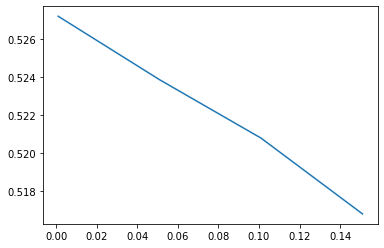

In [63]:
plt.plot(alpha, scores)

Вывод: нужно генерировать полиномиальные фичи и бороться с переобучением (добавлять регуляризацию)

### Попытка улучшить

In [64]:
df_comp = df.copy()

In [65]:
#df_comp.drop(columns=['s2'], inplace=True)

In [66]:
df_comp['sqrd_age'] = df_comp['age'].apply(lambda x: x**2)
#df_comp['sqrt_bp']  = df_comp['bp'].apply(lambda x: (1+x)**3)
df_comp['sqrd_bmi'] = df_comp['bmi'].apply(lambda x: x**2)  # (x/abs(x)) * abs(x)**0.5
#df_comp['sqrt_s1'] = df_comp['s1'].apply(lambda x: (1+x)**3)
df_comp['sqrd_s6'] = df_comp['s6'].apply(lambda x: x**2)

#df_comp['age_x_bp'] = df_comp.s1 * df_comp.s6

In [67]:
X_ = df_comp.drop(columns='target')
y = df_comp[['target']]

In [68]:
X_[:5]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,sqrd_age,sqrd_bmi,sqrd_s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0.001450,0.003806,0.000311
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,0.000004,0.002650,0.008502
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0.007276,0.001976,0.000672
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,0.007932,0.000134,0.000088
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,0.000029,0.001324,0.002175


<AxesSubplot:>

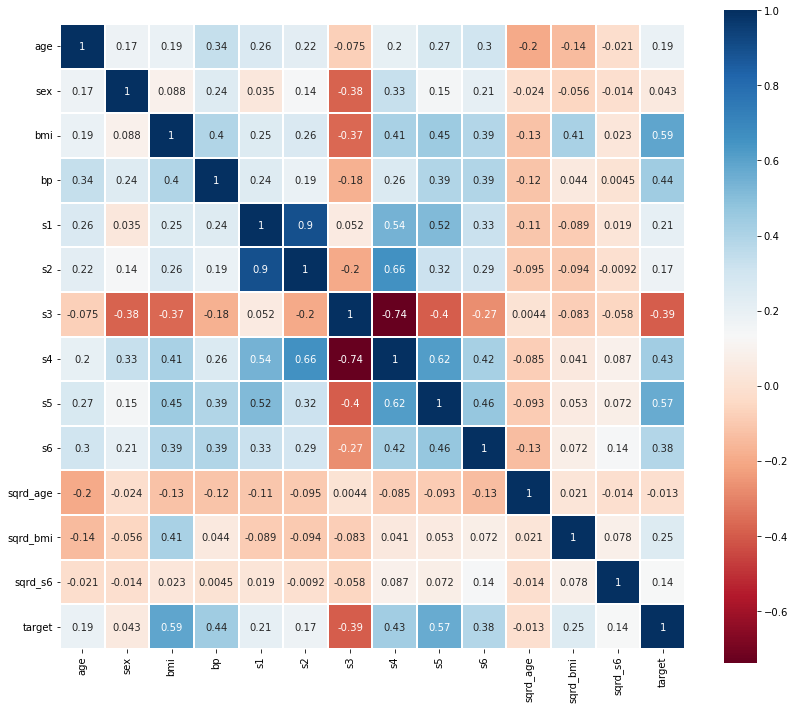

In [69]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

sns.heatmap(pd.concat([X_, y], axis=1).corr(),
           linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [70]:
model = LinearRegression()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=1234)

In [72]:
model.fit(X_train, y_train)

LinearRegression()

In [73]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

In [74]:
r2_score(y_train, pred_train), r2_score(y_test, pred_test)

(0.5443175595532448, 0.5093590998895434)

In [75]:
true_pred_list = list(zip(y_test.values.reshape(y_test.shape[0]), pred_test.reshape(pred_test.shape[0])))
base_line = np.arange(y_test.values.min(), y_test.values.max(), 10)

In [76]:
#true_pred_list

<AxesSubplot:>

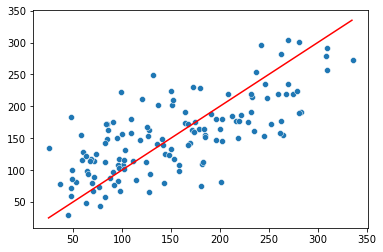

In [77]:
sns.scatterplot(x=[i[0] for i in true_pred_list], y=[i[1] for i in true_pred_list])
sns.lineplot(x=base_line, y=base_line, color='red')

In [78]:
r2_scores = []

for alpha in np.arange(0.001, 1.1, 0.2):
    
    model_lasso = Lasso(alpha=alpha)
    
    model_lasso.fit(X_train, y_train)
    pred_train = model_lasso.predict(X_train)
    
    r2_s = r2_score(y_train, pred_train)
    r2_scores.append((alpha, round(r2_s, 5)))
    
    print(f'alpha = {alpha}\nr2_score = {r2_s}\nmodel coefs:\n {model_lasso.coef_}\n')

alpha = 0.001
r2_score = 0.5442122164037017
model coefs:
 [  23.38254957 -265.87223011  488.21580207  330.35913857 -794.71821517
  557.87993335   77.19615762   90.5555362   811.83655209   67.71728495
 2588.51010612 1797.97160755 1276.45881845]

alpha = 0.201
r2_score = 0.5075805414716836
model coefs:
 [  -0.         -134.53657995  508.8999612   230.38693375   -0.
   -0.         -189.4799262     0.          479.26378842   11.10850279
    0.            0.            0.        ]

alpha = 0.401
r2_score = 0.47280312206422426
model coefs:
 [  0.          -0.         490.10948908 162.188241    -0.
  -0.         -93.64843288   0.         449.7695438    0.
   0.           0.           0.        ]

alpha = 0.6010000000000001
r2_score = 0.4449803517502783
model coefs:
 [  0.          -0.         448.83091912 116.59270542   0.
   0.         -45.22119147   0.         416.1888524    0.
   0.           0.           0.        ]

alpha = 0.801
r2_score = 0.406412799884457
model coefs:
 [  0.          

In [79]:
#model = Ridge(alpha=0.05)
#model.fit(X_train, y_train)

In [80]:
#X_train

In [81]:
cv_scores = cross_val_score(model, X_, y, scoring='r2', cv=5)

In [82]:
cv_scores.mean()

0.49879776555048466

**Итого**: на кросс-валидации удалось улучшить качество лишь совсем чуть-чуть с 0.4823 до 0.4987

## <font color='green'>Часть 2. Target encoding (**всего 5 баллов**)</font>

В этом части домашнего задания вы будете работать с выборкой `1C`. Вам нужно посчитать счетчики для `item_id` четырьмя способами:

    1) При помощи KFold схемы;  
    2) При помощи Leave-one-out схемы;
    3) При помощи smoothing схемы;
    4) При помощи expanding mean схемы.

### Подготовка данных

In [83]:
sales = pd.read_csv('sales_train.csv.gz')
sales.columns = ['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'target']
sales

,date,date_block_num,shop_id,item_id,item_price,target
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [84]:
index_cols = ['shop_id', 'item_id', 'date_block_num']

# For every month we create a grid from all shops/items combinations from that month
grid = [] 
for block_num in sales['date_block_num'].unique():
    cur_shops = sales[sales['date_block_num']==block_num]['shop_id'].unique()
    cur_items = sales[sales['date_block_num']==block_num]['item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))

#turn the grid into pandas dataframe
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)

#get aggregated values for (shop_id, item_id, month)
gb = sales.groupby(index_cols,as_index=False).agg({'target':'sum'})

#join aggregated data to the grid
all_data = pd.merge(grid,gb,how='left',on=index_cols).fillna(0)
#sort the data
all_data.sort_values(['date_block_num','shop_id','item_id'],inplace=True)

In [85]:
#product?

In [86]:
all_data[:5]

,shop_id,item_id,date_block_num,target
139255,0,19,0,0.0
141495,0,27,0,0.0
144968,0,28,0,0.0
142661,0,29,0,0.0
138947,0,32,0,6.0


### Mean encodings без регуляризации

После проделанной технической работы, мы готовы посчитать счетчики для переменной `item_id`. 

Ниже приведены две реализации подсчета счетчиков без регуляризации. Можно использовать данный код в качестве стартовой точки для реализации различных техник регуляризации.

#### Способ 1

In [87]:
# Calculate a mapping: {item_id: target_mean}
item_id_target_mean = all_data.groupby('item_id').target.mean()

# In our non-regularized case we just *map* the computed means to the `item_id`'s
all_data['item_target_enc'] = all_data['item_id'].map(item_id_target_mean)

# Fill NaNs
all_data['item_target_enc'].fillna(0.3343, inplace=True) 

# Print correlation
encoded_feature = all_data['item_target_enc'].values
print(np.corrcoef(all_data['target'].values, encoded_feature)[0][1])

0.4830386988621764


#### Способ 2

In [88]:
'''
     Differently to `.target.mean()` function `transform` 
   will return a dataframe with an index like in `all_data`.
   Basically this single line of code is equivalent to the first two lines from of Method 1.
'''
all_data['item_target_enc'] = all_data.groupby('item_id')['target'].transform('mean')

# Fill NaNs
all_data['item_target_enc'].fillna(0.3343, inplace=True) 

# Print correlation
encoded_feature = all_data['item_target_enc'].values
print(np.corrcoef(all_data['target'].values, encoded_feature)[0][1])

0.4830386988621764


In [89]:
all_data

,shop_id,item_id,date_block_num,target,item_target_enc
139255,0,19,0,0.0,0.022222
141495,0,27,0,0.0,0.056834
144968,0,28,0,0.0,0.141176
142661,0,29,0,0.0,0.037383
138947,0,32,0,6.0,1.319042
...,...,...,...,...,...
10768834,59,22162,33,0.0,1.556793
10769024,59,22163,33,0.0,0.581395
10769690,59,22164,33,0.0,1.235589
10771216,59,22166,33,0.0,0.295918


###  KFold схема (**1.25 балла**)

Необходимо реализовать Kfold схему с пятью фолдами. Используйте KFold(5) из sklearn.model_selection. 

1. Разбейте данные на 5 фолдов при помощи `sklearn.model_selection.KFold` с параметром `shuffle=False`.
2. Проитерируйтесь по фолдам: используйте 4 обучающих фолда для подсчета средних значений таргета по `item_id` и заполните этими значениями валидационный фолд на каждой итерации.

Обратите внимание на **Способ 1** из примера. В частности, изучите, как работают функции map и pd.Series.map. Они довольно полезны во многих ситуациях. 

In [90]:
from sklearn.model_selection import KFold

In [91]:
kf = KFold(n_splits=5, shuffle=False)

In [92]:
#Создадим датасет, в который будем кластть результат для test_index на каждой иттерации
cols = all_data.columns
cols = cols.append(pd.Index(['my_target_encoding']))
res = pd.DataFrame(columns=cols)

In [93]:
res

,shop_id,item_id,date_block_num,target,item_target_enc,my_target_encoding


In [94]:
for train_index, test_index in kf.split(all_data):
        
        all_data_c = all_data.copy()
        
        test_part = all_data_c.loc[test_index]
        train_part = all_data_c.loc[train_index]
        
        fold_mean = train_part.groupby('item_id').target.mean()
        #print(fold_mean)
        test_part['my_target_encoding'] = test_part.item_id.map(fold_mean)
        res = pd.concat([res, test_part], axis=0)

In [95]:
res

,shop_id,item_id,date_block_num,target,item_target_enc,my_target_encoding
0,59,22154,0,1.0,0.109870,0.084746
1,59,2552,0,0.0,0.018182,0.021583
2,59,2554,0,0.0,0.022222,NaN
3,59,2555,0,0.0,0.066429,0.056995
4,59,2564,0,0.0,0.058524,0.040307
...,...,...,...,...,...,...
10913845,21,7635,33,0.0,0.022727,NaN
10913846,21,7638,33,0.0,0.021277,0.020408
10913847,21,7640,33,0.0,0.022727,NaN
10913848,21,7632,33,0.0,0.021605,0.020202


In [96]:
# Заполняем NaN значением globalmean
res['my_target_encoding'].fillna(0.3343, inplace=True) 
encoded_feature = res['my_target_encoding'].values
corr = np.corrcoef(res['target'].values, encoded_feature)[0][1]
print(corr)

0.4166330182247779


Ожидаемый ответ 0.4165

Ну, почти

### Leave-one-out схема (**1.25 балла**)

Необходимо реализовать leave-one-out схему . Учтите, если вы запустите код из первого задания, задав количество фолдов такое же как размер выборки, то вы, вероятно, получите правильный ответ, но ждать будете очень-очень долго.

Для более быстрой реализации подсчета среднего таргета на всех объектах, кроме одного, вы можете:

1. Вычислить суммарный таргет по всем объектам.
2. Вычесть таргет конкретного объекта и разделить результат на `n_objects - 1`. 

Заметим, что пункт `1.` следует сделать для всех объектов. Также заметим, что пункт `2.` может быть реализован без циклов `for`.

Здесь может оказаться полезной функция .transform из **Способа 2** из примера.

In [97]:
all_data_c = all_data.copy()

In [98]:
all_data_c['item_target_sum'] = all_data_c.groupby('item_id').target.transform('sum')
all_data_c['item_target_cnt'] = all_data_c.groupby('item_id').target.transform('count')

In [99]:
all_data_c['LOOE'] = (all_data_c['item_target_sum'] - all_data_c['target'])/(all_data_c['item_target_cnt'] - 1)

In [100]:
all_data_c

,shop_id,item_id,date_block_num,target,item_target_enc,item_target_sum,item_target_cnt,LOOE
139255,0,19,0,0.0,0.022222,1.0,45,0.022727
141495,0,27,0,0.0,0.056834,42.0,739,0.056911
144968,0,28,0,0.0,0.141176,84.0,595,0.141414
142661,0,29,0,0.0,0.037383,12.0,321,0.037500
138947,0,32,0,6.0,1.319042,2092.0,1586,1.316088
...,...,...,...,...,...,...,...,...
10768834,59,22162,33,0.0,1.556793,699.0,449,1.560268
10769024,59,22163,33,0.0,0.581395,75.0,129,0.585938
10769690,59,22164,33,0.0,1.235589,493.0,399,1.238693
10771216,59,22166,33,0.0,0.295918,348.0,1176,0.296170


In [101]:
encoded_feature = all_data_c['LOOE'].values
corr = np.corrcoef(all_data_c['target'].values, encoded_feature)[0][1]
print(corr)

0.4803848311293092


Ожидаемый ответ 0.4803

### Smoothing (**1.25 балла**)

Необходимо реализовать smoothing с $\alpha = 100$. Используйте формулу:

$\frac{mean(target) \cdot nrows + globalmean \cdot \alpha }{nrows + \alpha}$,

где $globalmean=0.3343$. Заметим, что `nrows` - это количество объектов, принадлежащих конктертной категории, а не количество строк в датасете.

In [102]:
all_data_c = all_data.copy()

In [103]:
alpha = 100
globalmean = round(sum(all_data_c.target)/all_data_c.shape[0], 4)

In [104]:
globalmean

0.3343

In [105]:
all_data_c['item_target_sum'] = all_data_c.groupby('item_id').target.transform('sum')
all_data_c['item_target_cnt'] = all_data_c.groupby('item_id').target.transform('count')

In [106]:
all_data_c[:5]

,shop_id,item_id,date_block_num,target,item_target_enc,item_target_sum,item_target_cnt
139255,0,19,0,0.0,0.022222,1.0,45
141495,0,27,0,0.0,0.056834,42.0,739
144968,0,28,0,0.0,0.141176,84.0,595
142661,0,29,0,0.0,0.037383,12.0,321
138947,0,32,0,6.0,1.319042,2092.0,1586


mean(target) = sum(target)/len(target_grouped), где len(target_grouped) = nrows => smoothing = (sum(target_grouped) + globalmean*alpha)/(nrows*alpha)

In [107]:
all_data_c['smothing_enc'] = (all_data_c['item_target_sum'] + globalmean*alpha)/(all_data_c['item_target_cnt'] + alpha)

In [108]:
all_data_c

,shop_id,item_id,date_block_num,target,item_target_enc,item_target_sum,item_target_cnt,smothing_enc
139255,0,19,0,0.0,0.022222,1.0,45,0.237448
141495,0,27,0,0.0,0.056834,42.0,739,0.089905
144968,0,28,0,0.0,0.141176,84.0,595,0.168964
142661,0,29,0,0.0,0.037383,12.0,321,0.107910
138947,0,32,0,6.0,1.319042,2092.0,1586,1.260635
...,...,...,...,...,...,...,...,...
10768834,59,22162,33,0.0,1.556793,699.0,449,1.334117
10769024,59,22163,33,0.0,0.581395,75.0,129,0.473493
10769690,59,22164,33,0.0,1.235589,493.0,399,1.054970
10771216,59,22166,33,0.0,0.295918,348.0,1176,0.298926


In [109]:
encoded_feature = all_data_c['smothing_enc'].values
corr = np.corrcoef(all_data['target'].values, encoded_feature)[0][1]
print(corr)

0.48181987970972573


Ожидаемый ответ 0.4818

### Expanding mean схема (**1.25 балла**)

Необходимо реализовать *expanding mean* схему. Ее суть заключается в том, чтобы пройти по отсортированному в определенном порядке датасету (датасет сортируется в самом начале задания) и для подсчета счетчика для строки $m$ использовать строки от $0$ до $m-1$. Вам будет необходимо воспользоваться pandas функциями [`cumsum`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.cumsum.html) и [`cumcount`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.GroupBy.cumcount.html).

In [110]:
all_data_c = all_data.copy()

In [111]:
all_data_c['target_cumsum'] = all_data.groupby('item_id').target.cumsum() - all_data.target
all_data_c['target_cumcount'] = all_data.groupby('item_id').target.cumcount()

In [112]:
all_data_c[:5]

,shop_id,item_id,date_block_num,target,item_target_enc,target_cumsum,target_cumcount
139255,0,19,0,0.0,0.022222,0.0,0
141495,0,27,0,0.0,0.056834,0.0,0
144968,0,28,0,0.0,0.141176,0.0,0
142661,0,29,0,0.0,0.037383,0.0,0
138947,0,32,0,6.0,1.319042,0.0,0


In [113]:
#func = lambda x,y: 0 if y==0 else x/y

In [114]:
#all_data_c['expanding_mean_enc'] = all_data_c.apply(lambda x: func(x['target_cumsum'], x['target_cumcount']), axis=1)

In [115]:
all_data_c['expanding_mean_enc'] = np.where(all_data_c['target_cumcount']==0\
                                    ,0\
                                    ,all_data_c['target_cumsum']/all_data_c['target_cumcount'])

In [116]:
all_data_c

,shop_id,item_id,date_block_num,target,item_target_enc,target_cumsum,target_cumcount,expanding_mean_enc
139255,0,19,0,0.0,0.022222,0.0,0,0.000000
141495,0,27,0,0.0,0.056834,0.0,0,0.000000
144968,0,28,0,0.0,0.141176,0.0,0,0.000000
142661,0,29,0,0.0,0.037383,0.0,0,0.000000
138947,0,32,0,6.0,1.319042,0.0,0,0.000000
...,...,...,...,...,...,...,...,...
10768834,59,22162,33,0.0,1.556793,699.0,448,1.560268
10769024,59,22163,33,0.0,0.581395,75.0,128,0.585938
10769690,59,22164,33,0.0,1.235589,493.0,398,1.238693
10771216,59,22166,33,0.0,0.295918,348.0,1175,0.296170


In [117]:
encoded_feature = all_data_c['expanding_mean_enc']
corr = np.corrcoef(all_data['target'].values, encoded_feature)[0][1]
print(corr)

0.5024873044266731


Ожидаемый ответ 0.5025